In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [3]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2,cov_mat2,100)

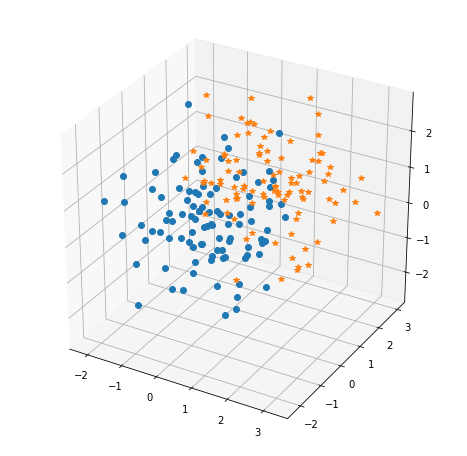

In [4]:
from mpl_toolkits.mplot3d import Axes3D , proj3d

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection ='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'*')
plt.show()

In [5]:
all_data = np.concatenate((class1,class2))

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[ 0.96061603,  0.8231397 ],
       [ 0.51174886, -0.42772427],
       [ 1.10746283,  0.31443048],
       [ 1.13843857, -2.30392026],
       [ 1.05908515,  0.12389276],
       [-0.29593135,  0.4465954 ],
       [ 1.15000733,  0.27083781],
       [ 1.82296804,  1.14443622],
       [ 0.79064624, -0.09331053],
       [ 0.88626924,  0.65614226],
       [ 3.1988716 , -1.09398558],
       [ 0.85616843, -0.83005641],
       [ 2.00813347,  0.21459624],
       [-0.60693113, -0.4530824 ],
       [ 2.16620209, -1.38531571],
       [ 0.31202921, -1.18033466],
       [ 0.90573637, -0.32519924],
       [ 0.20986929, -0.43088797],
       [ 0.12494258, -1.42643046],
       [ 1.28588982,  0.47171162],
       [-0.08419536, -0.51871767],
       [ 0.58585257,  0.9456025 ],
       [-0.98033546,  0.37992083],
       [ 1.61471514, -2.57865244],
       [ 2.31437998, -1.11554318],
       [ 2.60230759,  0.0107346 ],
       [ 0.13589429, -1.83988259],
       [ 1.77626894,  0.34550118],
       [ 0.20355178,

In [6]:
(pca.components_)

array([[-0.70192842, -0.5921818 , -0.39574892],
       [-0.53415143,  0.07012607,  0.84247527]])

In [7]:
cov = np.cov(all_data.T)

In [8]:
np.linalg.eig(cov)

(array([1.66687362, 1.03376632, 0.98553135]),
 array([[-0.70192842, -0.53415143,  0.47114621],
        [-0.5921818 ,  0.07012607, -0.80274719],
        [-0.39574892,  0.84247527,  0.36553824]]))

In [9]:

total = sum(pca.explained_variance_)
k=0
current_variance = 0
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k = k+1
k

2

In [10]:
#-----------------------------------------OLIVETTI--------------------------------------

In [11]:
from sklearn import datasets
oliv = datasets.fetch_olivetti_faces()

In [12]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [13]:
oliv['data'].shape , oliv['images'].shape

((400, 4096), (400, 64, 64))

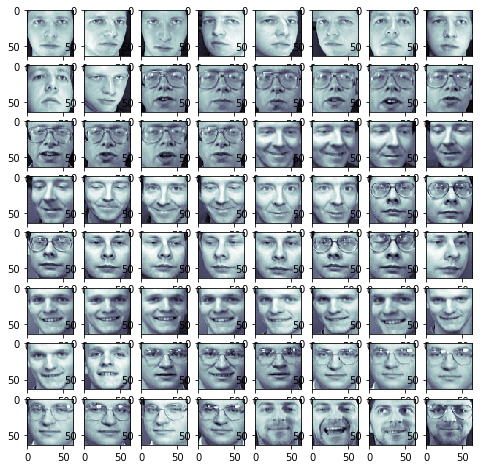

In [14]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax= fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i] , cmap=plt.cm.bone)
plt.show()

In [15]:
x = oliv.data
y = oliv.target

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca = PCA(n_components = 123 , whiten =True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [17]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

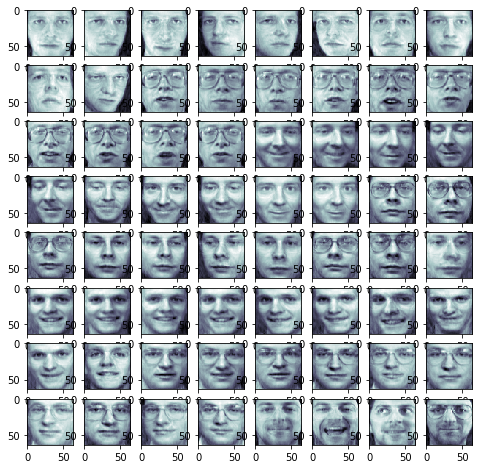

In [18]:
x_approx_img = x_approx.reshape(400,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
plt.show()

In [48]:
x_approx_img

array([[[0.293621  , 0.39896345, 0.44415933, ..., 0.40553683,
         0.38024876, 0.33855805],
        [0.304084  , 0.40454796, 0.4469748 , ..., 0.39816397,
         0.36843663, 0.29657397],
        [0.3158908 , 0.39592838, 0.46027416, ..., 0.38861644,
         0.37078512, 0.28767717],
        ...,
        [0.19494647, 0.19650668, 0.2189197 , ..., 0.10305849,
         0.15861988, 0.18740186],
        [0.1778508 , 0.19826652, 0.21212402, ..., 0.09806091,
         0.14141661, 0.18294385],
        [0.1663234 , 0.21732165, 0.2249159 , ..., 0.16833772,
         0.13979189, 0.17097642]],

       [[0.52203536, 0.5095421 , 0.49635643, ..., 0.2093061 ,
         0.2314091 , 0.2704841 ],
        [0.49343225, 0.5072318 , 0.5069446 , ..., 0.19115536,
         0.20227052, 0.23677635],
        [0.51776814, 0.5239203 , 0.5259554 , ..., 0.1774647 ,
         0.1827537 , 0.21778964],
        ...,
        [0.7860936 , 0.8116605 , 0.81939596, ..., 0.13425845,
         0.12462553, 0.08888821],
        [0.8

In [19]:
#-------------Applying SVM on OLIVETTI-------------------

In [4]:
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split


x = oliv.data[:,0:4]
y = oliv.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y)


NameError: name 'oliv' is not defined

In [60]:
clf = svm.SVC(kernel='linear')
clf.fit(xtrain ,ytrain)
clf.score(xtest,ytest)

0.03

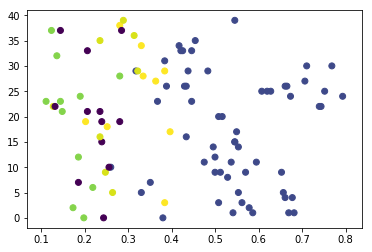

In [59]:
prediction = clf.predict(xtest)
prr = (np.c_[xtest[:,0],ytest])
plt.scatter(xtest[:,0],ytest, c=prediction)
plt.show()


In [ ]:
#------------------------------EIGEN FACES-------------------------------

In [61]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

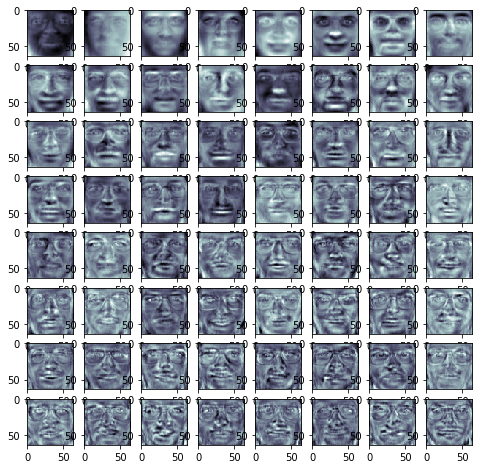

In [62]:
eigenfaces = eigenv.reshape(123,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()

In [63]:
#-----------------------------------------LFW dataset-------------------------

In [5]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100 ,resize =0.4) 


In [6]:
lfw.data.shape , lfw.images.shape

((1140, 1850), (1140, 50, 37))

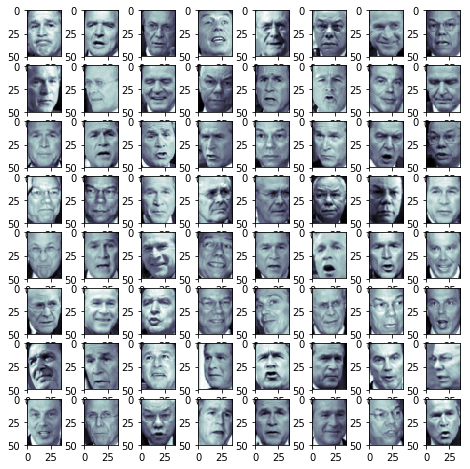

In [9]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i] , cmap = plt.cm.bone)
plt.show()

In [11]:
x , y = lfw.data , lfw.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 0)
pca_oliv = PCA()
pca_oliv.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
k = 0
total = 0
while total<0.99:
    total+= pca_oliv.explained_variance_ratio_[k]
    k = k+1
k

316

In [13]:
pca_lfw = PCA(n_components = k , whiten = True)
x_transformed = pca_lfw.fit_transform(xtrain)
x_transformed.shape

(855, 316)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

xtrain_pca = x_transformed
xtest_pca = pca_lfw.transform(xtest)

In [21]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(xtrain,ytrain)
print(time.time()-start)
ypred= rf.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.345259428024292
             precision    recall  f1-score   support

          0       0.59      0.72      0.65        61
          1       0.62      0.36      0.46        36
          2       0.65      0.87      0.74       122
          3       0.43      0.19      0.27        31
          4       0.58      0.20      0.30        35

avg / total       0.60      0.62      0.58       285

[[ 44   2  12   2   1]
 [ 13  13   9   0   1]
 [  7   3 106   4   2]
 [  6   1  17   6   1]
 [  4   2  20   2   7]]
